<h1><center>PORTADA</h1>

<p align="center">Curso:Machine Learning</p>

<p align="center"> Código Curso: 203008067 </p>

<p align="center"> Grupo: 203008067_14 </p>

 <p align="center"> Fase 4 - Componente práctico - Prácticas simuladas</p>

 <p align="center">  Presentado por: Wagner Alonso Fernández Villalobos</p>

<p align="center"> Código: 203008067A_1702 </p>

 <p align="center">  Tutor(a): Rafael Roberto Ruiz Escorcia </p>

 <p align="center"> UNIVERSIDAD NACIONAL ABIERTA Y A DISTANCIA - UNAD </p>

<p align="center"> Fecha: 14/07/2024 </p>

<h1><center>INTRODUCCIÓN</h1>

<p style="text-align: justify;">En la era del Big Data y las nuevas tecnologías, la capacidad de analizar y extraer información de grandes conjuntos de datos se ha vuelto crucial para el éxito en diversos ámbitos, hay dos herramientas poderosas que se destacan en este contexto, que son las máquinas de soporte vectorial (SVM) y los algoritmos de agrupamiento.Las SVM por sus siglas en inglés, son un tipo de algoritmo de aprendizaje automático ampliamente utilizado para la clasificación de datos, su capacidad es para encontrar patrones complejos y separar datos en diferentes categorías los convierte en una herramienta invaluable para tareas como el reconocimiento de imágenes, el análisis de texto y la detección de fraudes.</p>

<p style="text-align: justify;">Por otro lado los algoritmos de agrupamiento, que se enfocan en organizar conjuntos de datos en grupos o "clusters" basados en similitudes entre los elementos; esta técnica resulta de gran utilidad para estructurar datos de manera que puedan ser explorados, categorizados, visualizados y analizados de forma más efectiva.</p>

<h1><center>DESARROLLO</h1>

#### Analisis Exploratorio de Datos (EDA)

Importar librerías necesarias para explorar e imputar datos

In [103]:
import pandas as pd
import missingno as msno# para imputar datos
import matplotlib.pyplot as plt
import seaborn as sns

Lectura del archivo

In [104]:
df = pd.read_csv('data/Anexo 2 - Predicción de la productividad de los empleados de la confección.csv')
df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


Se realiza Analisis Exploratorio de Datos (EDA)

<p style="text-align: justify;">Es importante realizar un analisis a los datos con los cuales se piensa trabajar, ya que coadayuva a determinar de una mejor manera manipular las fuentes de datos, para obtener respuestas que necesitan, lo que facilita a los científicos de datos descubrir patrones, detectar anomalías, para que los modelos de Machine Learing no generen sesgos, sobreajustes (overfiting) o subajustes (underfiting), que susciten tomar decisiones erroneas. Idris (2014)</p>

Información sobre el DataFrame

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

Medidas de tendencia central del DataFrame

In [106]:
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


Verificación de datos faltantes

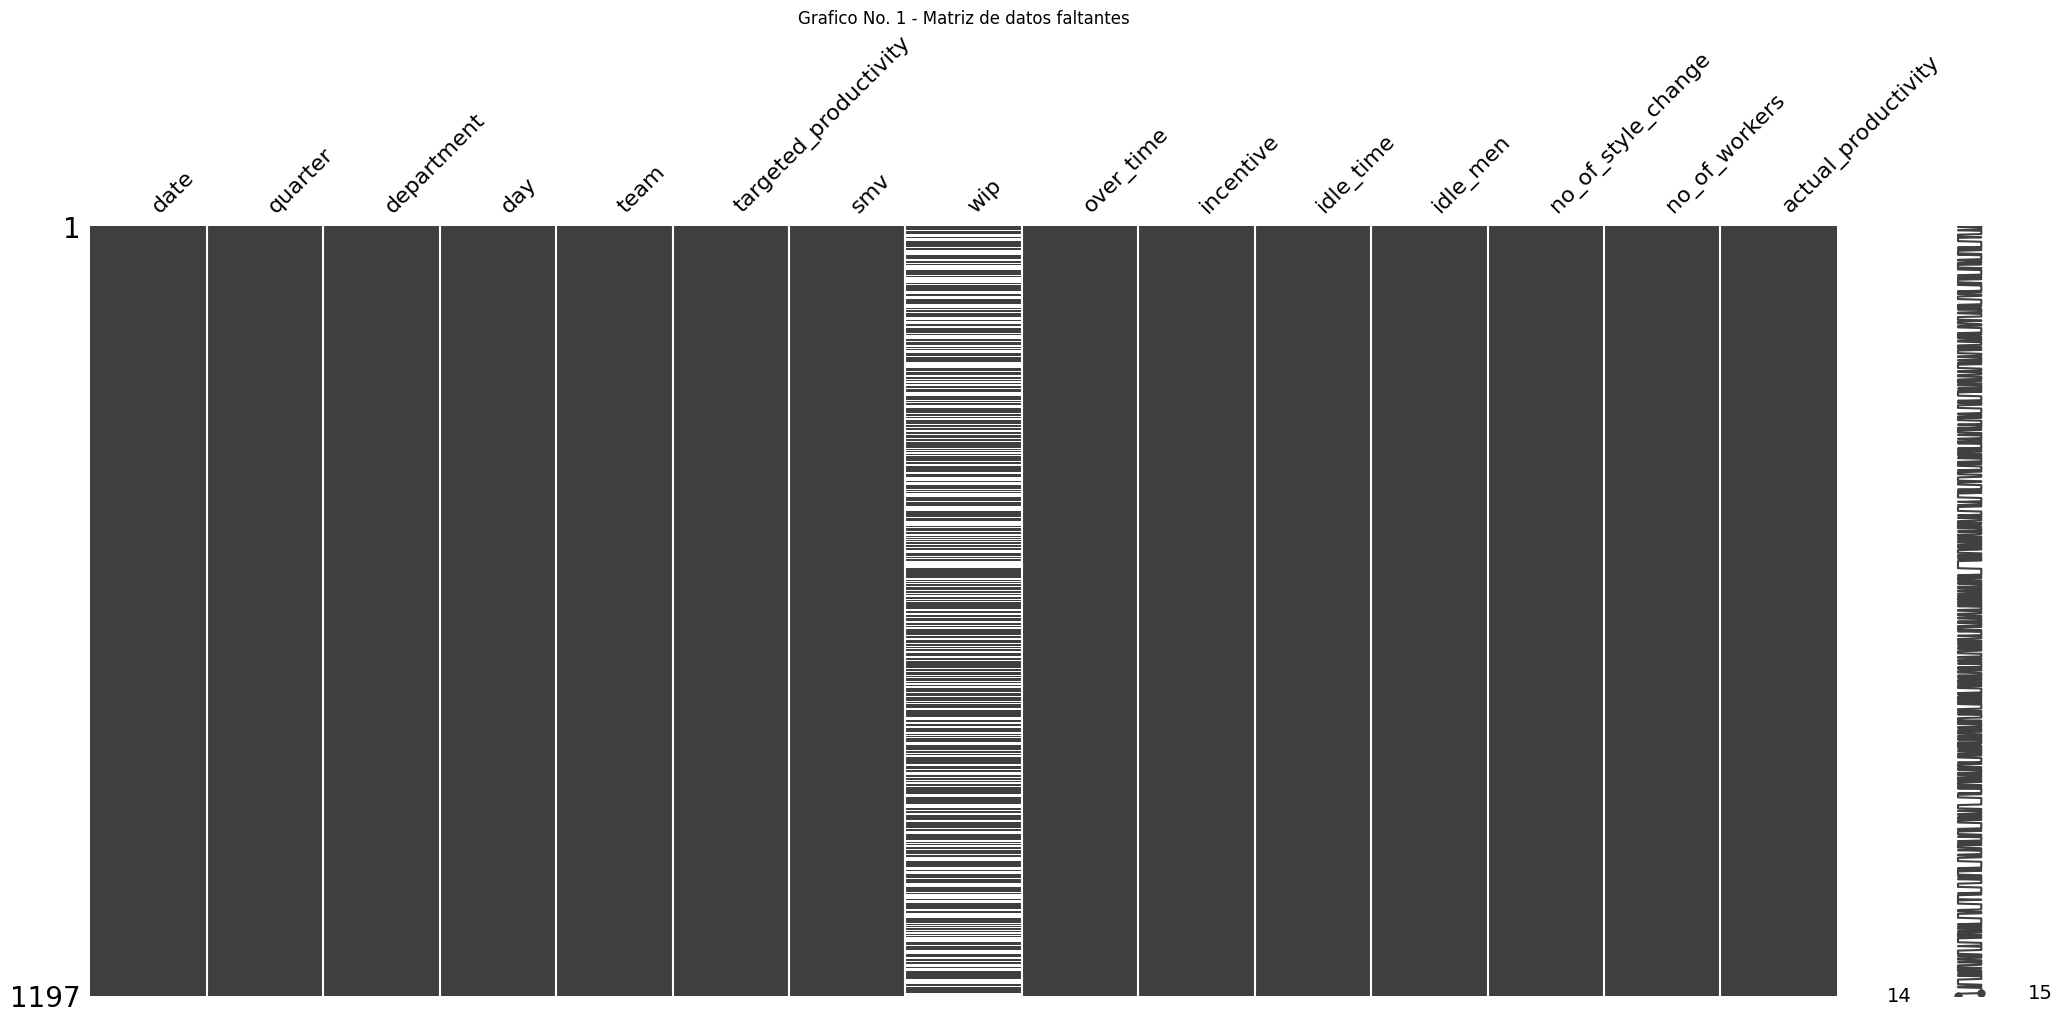

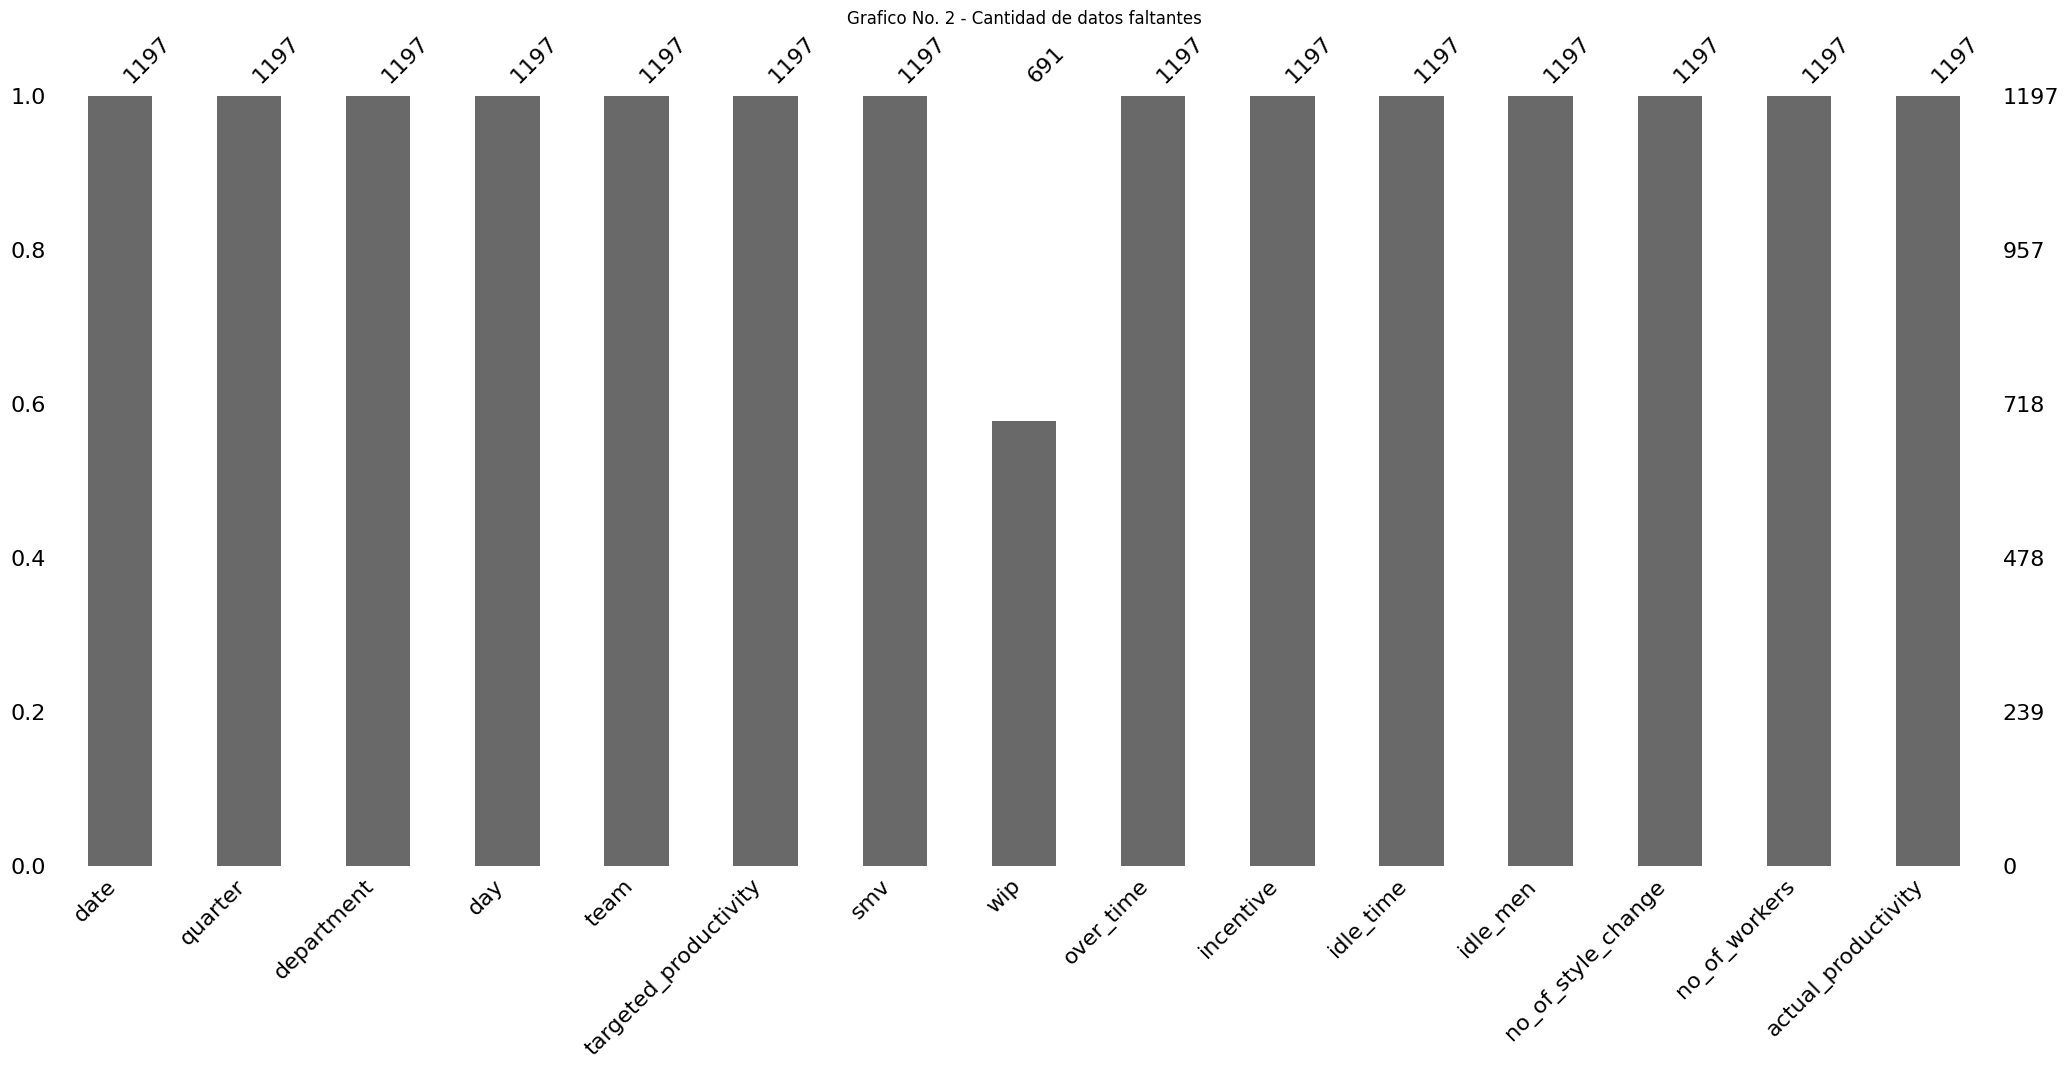

In [107]:
msno.matrix(df)#elaborar graficos con datos faltante tipo matriz
plt.title("Grafico No. 1 - Matriz de datos faltantes")
plt.show()

msno.bar(df)# elaborar grafico de barras para que muestre la cantidad de  datos faltantes
plt.title("Grafico No. 2 - Cantidad de datos faltantes")

plt.show()

Imputar datos faltantes en el DataFrame

In [108]:
df_imputed = df['wip'].median()#calcular la mediana de la columna 'wip'

#imputar el df
df['wip'].fillna(df_imputed, 
                 inplace=True)
df

C:\Users\WAGNER FERNÁNDEZ\AppData\Local\Temp\ipykernel_13512\885409208.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['wip'].fillna(df_imputed,


,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,1039.0,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,1039.0,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,1039.0,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,1039.0,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,1039.0,1800,0,0.0,0,0,15.0,0.505889


#### Acción 1: Support Vector Machine.

Se procede con importar las librerías necesarias para crear el modelo de SVM

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

a. Con la base de entrenamiento aplicar un modelo al nivel de productividad real (alto y bajo) de un equipo en función de las siguientes variables: el día de la semana, el cuarto del mes, departamento, número de trabajadores, tiempo estándar asignado (SMV), trabajo en progreso (WIP) y tiempo extra.

In [110]:
#se procede con convertir la productividad en categorías
df['actual_productivity'] = df['actual_productivity'].apply(lambda x: 'high' if x >= 0.85 else 'low')

#se procede con eleccionar variables predictoras y variable objetivo
X = df[['quarter', 'department', 'day', 'smv', 'wip', 'over_time', 'no_of_workers']]
y = df['actual_productivity']

#variables categóricas en variables numericas 
X = pd.get_dummies(X, columns=['quarter','department', 'day'], drop_first=True)

b.  Seleccionar una base de entrenamiento (80%) y una base de prueba (20%). 

In [111]:
#crear los conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, # datos de prueba
                                                    random_state=42)

c.  Realizar las predicciones  sobre la base de prueba. Calcule la precisión (accuracy) 
sobre los datos de prueba. z

In [112]:

scaler = StandardScaler()#escalamiento de datos
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear el modelo SVM
svm_model = SVC(kernel='linear', random_state=42)# desarrollo del modelo de vector de soporte
svm_model.fit(X_train_scaled, y_train)

y_pred = svm_model.predict(X_test_scaled)#predicción de los datos

report = classification_report(y_test, y_pred)#evaluación del modelo

print(report)#impresión del reporte

              precision    recall  f1-score   support

        high       0.71      0.26      0.38        66
         low       0.77      0.96      0.86       174

    accuracy                           0.77       240
   macro avg       0.74      0.61      0.62       240
weighted avg       0.76      0.77      0.72       240



#### Acción 2: K-Means Clustering. 

Se  quiere  agrupar  los  equipos  de  trabajo,  usando  el  método  K-Means  Clustering,  basados en los datos del “Anexo 2 - productividad_confeccion.csv”, lo cual permitirá  identificar patrones y similitudes entre equipos para tomar decisiones informadas sobre  la  gestión  de  la  producción  y  la  asignación  de  recursos.  Para  esto,  se  necesita  dar  respuesta a las siguientes preguntas: 
 

a.¿Cuántos clusters sería adecuado seleccionar para representar eficientemente los diferentes tipos de equipos de trabajo? 

Importar las librerías necesarias para crear el modelo de K medio o K-Means

In [113]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

Imputar los datos requeridos

In [114]:
df = pd.read_csv('data/Anexo 2 - Predicción de la productividad de los empleados de la confección.csv')
df_imputed = df['wip'].median()#calcular la media de la columna 'wip'
df['wip'].fillna(df_imputed, 
                 inplace=True)

C:\Users\WAGNER FERNÁNDEZ\AppData\Local\Temp\ipykernel_13512\3046208539.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['wip'].fillna(df_imputed,


Seleccionar caracteristicas relevantes del DataFrame

In [115]:
#se selecciona las características relevantes para el clustering
X = df[['quarter', 
        'department', 
        'day', 
        'smv', 
        'wip', 
        'over_time', 
        'no_of_workers']]

X = pd.get_dummies(X, columns=['quarter',
                               'department', 
                               'day'], drop_first=True)# conversión a datos numericos

Estandarizar y normalizar los datos

In [126]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Seleccionar las columnas numéricas relevantes para el análisis
data = df[['smv', 'wip', 'over_time', 'no_of_workers']]

# Estandarizar los datos
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data)

# Normalizar los datos
min_max_scaler = MinMaxScaler()
data_normalized = min_max_scaler.fit_transform(data)

# Crear un nuevo dataframe con los datos estandarizados y normalizados
df = pd.DataFrame(data_normalized, columns=data.columns)
df = pd.DataFrame(data_standardized, columns=data.columns)

Aplicación del modelo K-Means

In [127]:
#se procede con normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


#se procede con aplicar el modelo K-mans
kmeans = KMeans(n_clusters=3)  # Reemplaza n_clusters con el número deseado de clusters
kmeans.fit(X_scaled)

#obtención de las etiquetas de los clusters asignados a cada equipo
cluster_labels = kmeans.labels_

df["Cluster"] = cluster_labels#este fragmento es importante, porque crea una nueva columna llamada cluster con laS etiquetas

df.head()# leer los resultados

c:\Users\WAGNER FERNÁNDEZ\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,smv,wip,over_time,no_of_workers,Cluster
0,1.014552,-0.013197,0.750589,1.099229,0
1,-1.016778,-0.062587,-1.077682,-1.199268,0
2,-0.333878,-0.113407,-0.271092,-0.185225,0
3,-0.333878,-0.113407,-0.271092,-0.185225,0
4,0.990783,0.031181,-0.790895,0.964023,0


b.¿Cuál  es  el  perfil  característico  de  cada  cluster  en  términos  de  las  variables  proporcionadas? 
 

El perfil caracteristico de cada cluster en terminos de las variables proporcionadas, sucede si aplicamos el algoritmo de K-Means a estos datos, podríamos obtener clusters que representen diferentes patrones o comportamientos en relación con las variables proporcionadas; se puede decir que encontrar clusters con un alto valor de 'smv' y 'no_of_workers', indicando tareas que requieren mucho tiempo y muchos trabajadores. También se podría encontrar clusters con un alto valor en 'over_time', indicando tareas que requieren horas extras de trabajo.

El perfil característico de cada cluster se puede utilizar para comprender mejor los diferentes grupos de datos y extraer información relevante, Por ejemplo: se puede identificar clusters con altas necesidades de personal o clusters con altos costos de tiempo de mano de obra, Esto puede coadyuvar a la toma decisiones informadas y realizar mejoras en la planificación y gestión de recursos.

c.¿Cómo podrían utilizarse estos clusters para mejorar la gestión de la producción y  la asignación de recursos en la fábrica? 

Para el caso objeto de estudio, se recomienda utilizar el metodo del codo (Elbow Method), que consiste en trazar la suma de las distancias al cuadrado entre cada punto de datos y su centroide asignado para diferentes valores de k. En este método, buscamos el valor de k donde la disminución en la suma de las distancias al cuadrado se ralentiza y forma una curva similar a un codo. (Grus, 2023)

c:\Users\WAGNER FERNÁNDEZ\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\WAGNER FERNÁNDEZ\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\WAGNER FERNÁNDEZ\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\WAGNER FERNÁNDEZ\AppData\Local\Programs\Pyt

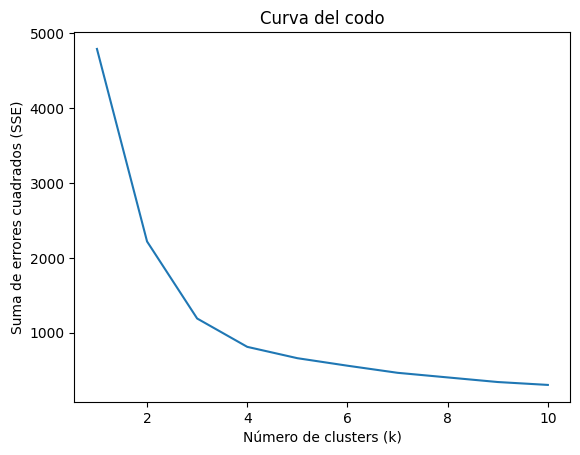

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#se selecciona las columnas numéricas relevantes para el análisis
data = df[['smv', 'wip', 'over_time', 'no_of_workers']]

#se procede con normalizar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

#iniciar una lista vacía para almacenar las sumas de los errores cuadrados (SSE) por sus siglas en inglés
sse = []

#probar diferentes valores de k (número de clusters)
for k in range(1, 11):
    #ajustar el modelo de KMeans con K clusters
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data_scaled)
    
    #calculo de la suma de los errores cuadrados (SSE) para el modelo
    sse.append(kmeans.inertia_)

#plotear grafico de codo
plt.plot(range(1, 11), sse)
plt.xlabel('Número de clusters (k)')
plt.ylabel('Suma de errores cuadrados (SSE)')
plt.title('Curva del codo')
plt.show()

Los clusters recomendados conforme a los datos analizados en el ejercicio, se recomienda autilizar 4 clusters en el modelo de K-Means.

#### Acción 3: Agglomerative Clustering. 

Use el método Agglomerative Clustering sobre los equipos de trabajo para entender los patrones de producción compartidos. Seleccione mínimo seis variables que usted estime más relevantes para construir los clusters y expliqué su escogencia. Con lo  anterior dé solución a lo siguiente: 

a.  Encuentre el número óptimo de clusters utilizando dendrogramas.

Se procede con importar las librerías requerídas para optimizar los clusters y crear dendrograma

In [119]:
from sklearn.preprocessing import StandardScaler#para escalar los datos
from sklearn.cluster import AgglomerativeClustering#para desarrollar el agrupamiento aglomerativo
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

Imputación por medio de la mediana al conjunto de datos para mejorar las predicciones

In [120]:
#lectura df
df = pd.read_csv('data/Anexo 2 - Predicción de la productividad de los empleados de la confección.csv')


df_imputed = df['wip'].median()#calcular la media de la columna 'wip'

#imputación del Dataframe
df['wip'].fillna(df_imputed, 
                 inplace=True)
df

C:\Users\WAGNER FERNÁNDEZ\AppData\Local\Temp\ipykernel_13512\187975040.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['wip'].fillna(df_imputed,


,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,1039.0,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,1039.0,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,1039.0,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,1039.0,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,1039.0,1800,0,0.0,0,0,15.0,0.505889


Seleccionar las 6 variables relevantes

In [121]:
#selección de las 6 variables relevantes
X = df[['smv', 'wip', 'over_time', 
        'no_of_workers', 'actual_productivity', 'day']]

X = pd.get_dummies(X, columns=['day'], 
                   drop_first=True)

#escalamiento de las variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Elaboración del dendrograma para saber la proximidad de los clusters

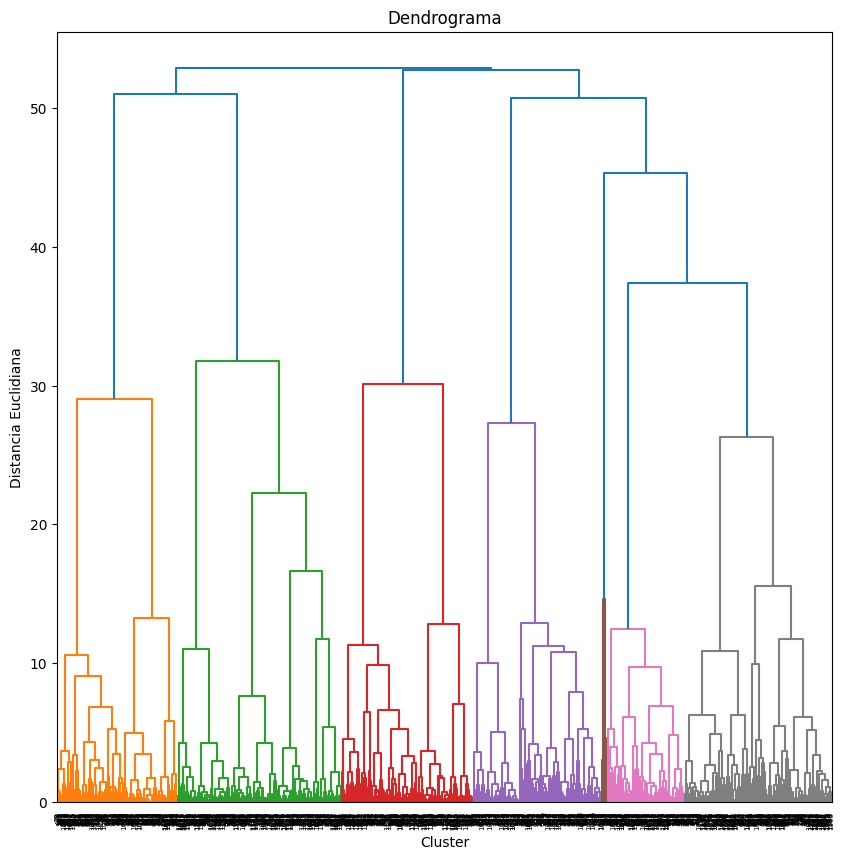

In [122]:
plt.figure(figsize=(10, 10))#tamaño del grafico
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))#creación del dendrograma

#añadir leyendas
plt.title('Dendrograma')
plt.xlabel('Cluster')
plt.ylabel('Distancia Euclidiana')
plt.show()

b.  Entrene el modelo de agrupamiento jerárquico. 

In [123]:
#ajuste o encontrar el número óptimo de clusters
n_clusters = 3  #número óptimo de clusters según el dendrograma

#entrenamiento del modelo de agrupamiento jerárquico
clustering = AgglomerativeClustering(n_clusters=n_clusters, #numero de cluster asignados
                                     affinity= 'euclidean', #aplicación de la distancia euclideana
                                     linkage='ward')
clustering.fit(X_scaled)


c:\Users\WAGNER FERNÁNDEZ\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', n_clusters=3)

c.  Visualice los clusters. Cuál es el perfil característico de cada clúster?

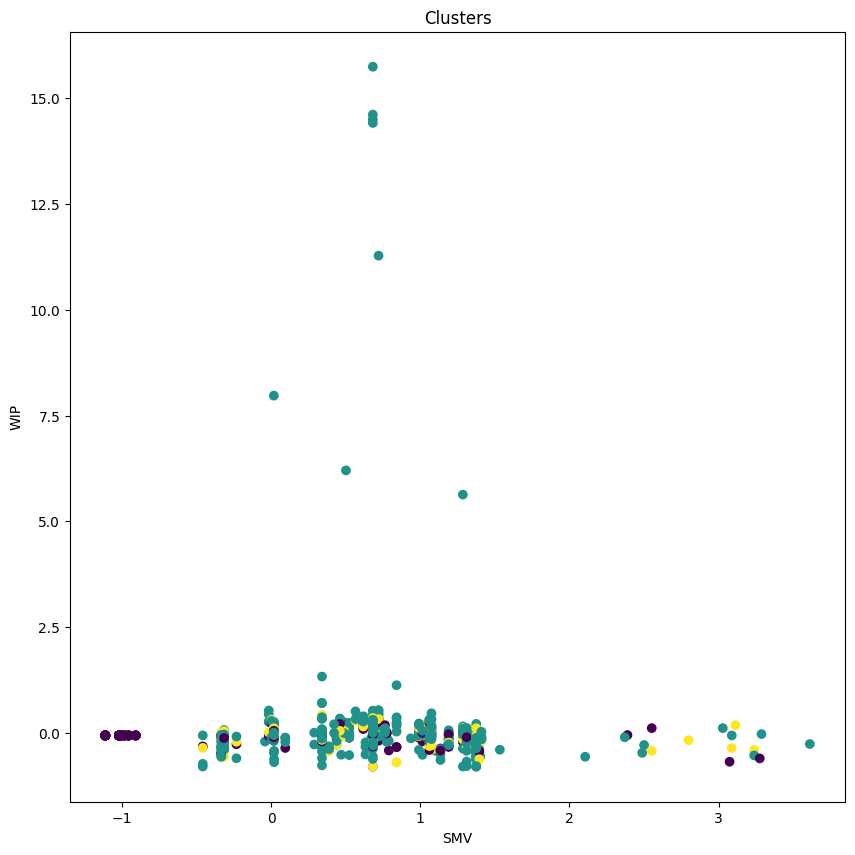

In [124]:
plt.figure(figsize=(10, 10))#tamaño de la figura

#visualizar los clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clustering.labels_)

#leyendas
plt.title('Clusters')
plt.xlabel('SMV')
plt.ylabel('WIP')
plt.show()

El perfil caractertistico de cada cluster es..

Evaluación del hierarchical clustering

In [125]:
from sklearn.metrics import silhouette_score
evaluation = clustering.fit_predict(X)
silhouette_score(X,evaluation)

c:\Users\WAGNER FERNÁNDEZ\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


0.6757737044803519

<h1><center>CONCLUSIÓN</h1>




<p style="text-align: justify;">Los algoritmos de K-Means o K medio, son no supervisados, en la cual los datos deben estar </p>

<p style="text-align: justify;">Por ultimo los datos, no se recomienda hacer eliminación, es cuestión de realizar ingeniería de caracteristicas o Feature Engineering, que según Zheng & Casari (2018), la mejor forma para que los algoritmos de machine learning funcionen adecuadamente, es haciendo imputación de datos; ya hay casos atipicos que es requerido eliminar varibles numericas o categóricas para que no hagan mucho ruido a la hora de modelar los datos.</p>

<p style="text-align: justify;">Para inferir, las máquinas de soporte vectorial (SVM) y algoritmos de agrupamiento abre un mundo de posibilidades para el análisis de datos en la era del Big Data, la combinación de estas herramientas permite abordar una amplia gama de desafíos, desde la clasificación y el agrupamiento hasta la extracción de información y la toma de decisiones; la cual suscita sabiduría en los negocios o casos de uso. Para el caso realizado en la acción 1, muestra un informe de rendimiento o métricas de evaluación  de un 74 a 76 porciento de precisión.</p>

<p style="text-align: justify;">Los algoritmos de K-Means o K medio, son no supervisados, en la cual los datos deben estar...(seguir escribiendo) </p>

<p style="text-align: justify;">El agrupamiento aglomerativo, se observa que al utilizar 4 clusteres, el porcentaje de precisión se mantiene en un 68% y en el dendrograma se observa una mejor distribución o cercanía entre dichos clusteres </p>

<h1><center>REFERENCIAS BIBLIOGRÁFICAS</h1>

Giuseppe Bonaccorso. (2018). Machine Learning Algorithms: Popular Algorithms for Data Science and Machine Learning, 2nd Edition: Vol. 2nd ed. Packt Publishing. (pp. 340-355). 

Grus, J. (2023). Ciencia de datos desde cero. Segunda edición: Principios básicos con Python. ANAYA MULTIMEDIA

Idris, I. (2014). Python Data Analysis. Packt Publishing. (pp.131-134).

Roldán, R. C., Martín, E. M., & Rodríguez, A. R. (2019). Big data con python: Recolección, almacenamiento y proceso. Alpha Editorial.

Samir Madhavan. (2015). Mastering Python for Data Science: Explore the World of Data Science Through Python and Learn How to Make Sense of Data. Packt Publishing. (pp. 11-12).

How to Join Two DataFrames in Pandas Using a Full Outer Join | Saturn Cloud Blog. (2023, 5 diciembre). https://saturncloud.io/blog/how-to-join-two-dataframes-in-pandas-using-a-full-outer-join/#:~:text=To%20perform%20a%20full%20outer%20join%20in%20Pandas%2C%20you%20can,a%20match%20in%20both%20tables.

Raschka, S., & Mirjalili, V. (2017). Python Machine Learning - Second Edition: Vol.2nd ed. Packt Publishing. (pp. 363-372).

Zheng, A., & Casari, A. (2018). Feature Engineering for Machine Learning: Principles and Techniques for Data Scientists. «O’Reilly Media, Inc.»